In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-08-07 03:44:07.574116: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 03:44:07.574276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 03:44:07.724716: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


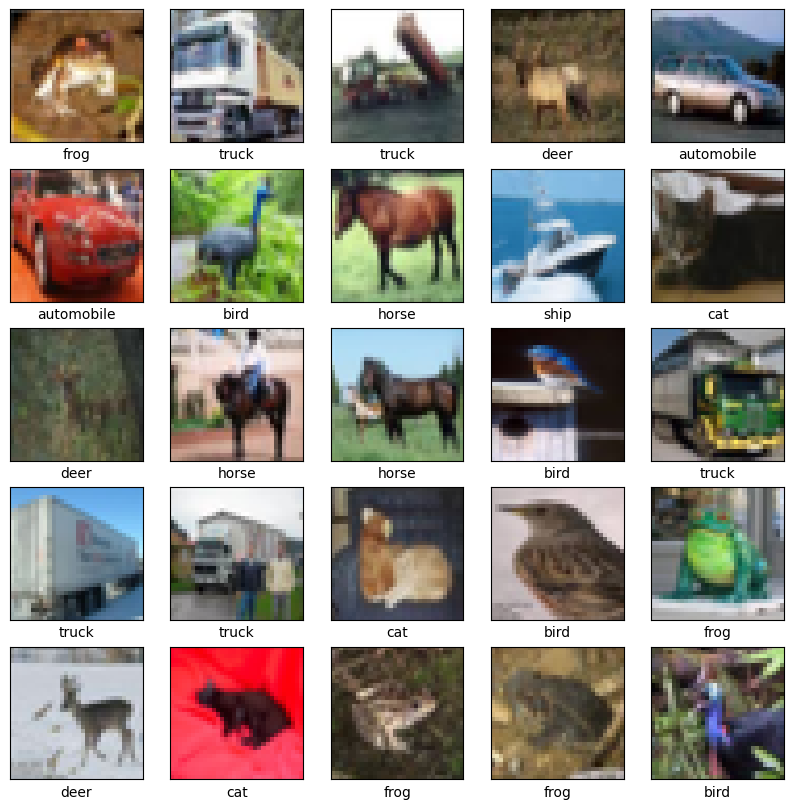

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3357 - loss: 1.7903 - val_accuracy: 0.5309 - val_loss: 1.2886
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5572 - loss: 1.2367 - val_accuracy: 0.5971 - val_loss: 1.1288
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6275 - loss: 1.0597 - val_accuracy: 0.5972 - val_loss: 1.1417
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6597 - loss: 0.9601 - val_accuracy: 0.6575 - val_loss: 0.9864
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6934 - loss: 0.8745 - val_accuracy: 0.6720 - val_loss: 0.9471
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7159 - loss: 0.8149 - val_accuracy: 0.6909 - val_loss: 0.9064
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7358 - loss: 0.7615 - val_accuracy: 0.6872 - val_loss: 0.8952
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7495 -

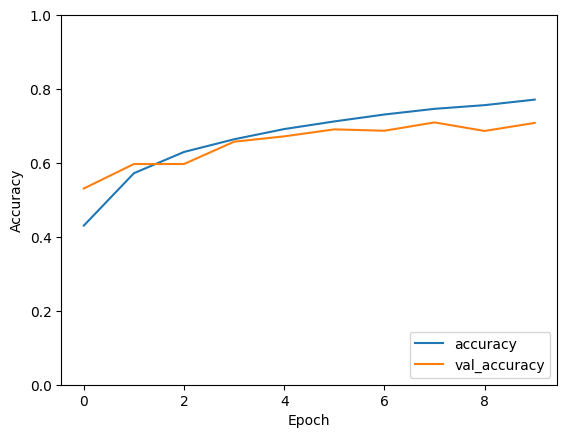

In [1]:
#import necessary libraries 

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#load and preprocess the data 

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#visualize the data 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',
'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#build the CNN Model 

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

#Compile the Model 

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

#Train the Model 

history = model.fit(train_images, train_labels, epochs=10,
              validation_data=(test_images, test_labels))

#Evaluate the Model 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

#Plotting training history 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

B. HANDWRIITEN DIGIT RECOGNITION USING CNN (MINIST DATASET)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8951 - loss: 0.3276 - val_accuracy: 0.9846 - val_loss: 0.0478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9845 - loss: 0.0475 - val_accuracy: 0.9886 - val_loss: 0.0345
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9882 - val_loss: 0.0402
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9942 - loss: 0.0175 - val_accuracy: 0.9921 - val_loss: 0.0288
313/313 - 1s - 5ms/step - accuracy: 0.9921 - loss: 0.0288
Test accuracy: 0.9921000003814697


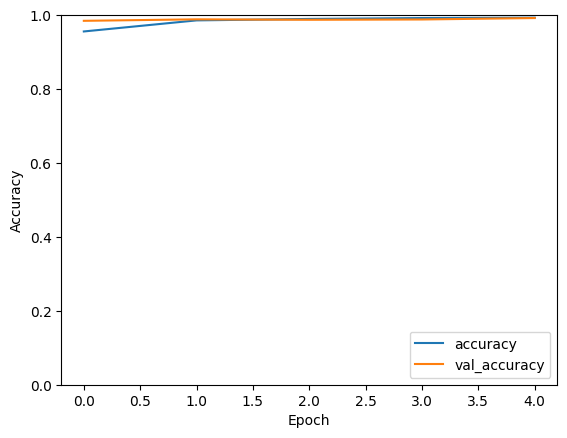

In [2]:
#import necessary libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


#Load and preprocess the data 

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#Build the CNN model 

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

#Compile the model 

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
#Train the model 

history = model.fit(train_images, train_labels, epochs=5,
                 validation_data=(test_images, test_labels))


#Evaluate the model 

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

#Plot training the history 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

C.FINE-TUNING PRE TRAINED MODELS FOR CAT VS DOG CLASSFIFICATION 

2024-08-07 15:22:12.870342: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 15:22:12.870502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 15:22:13.052492: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 75048 files belonging to 1 classes.
Using 60039 files for training.
Found 75048 files belonging to 1 classes.
Using 15009 files for validation.


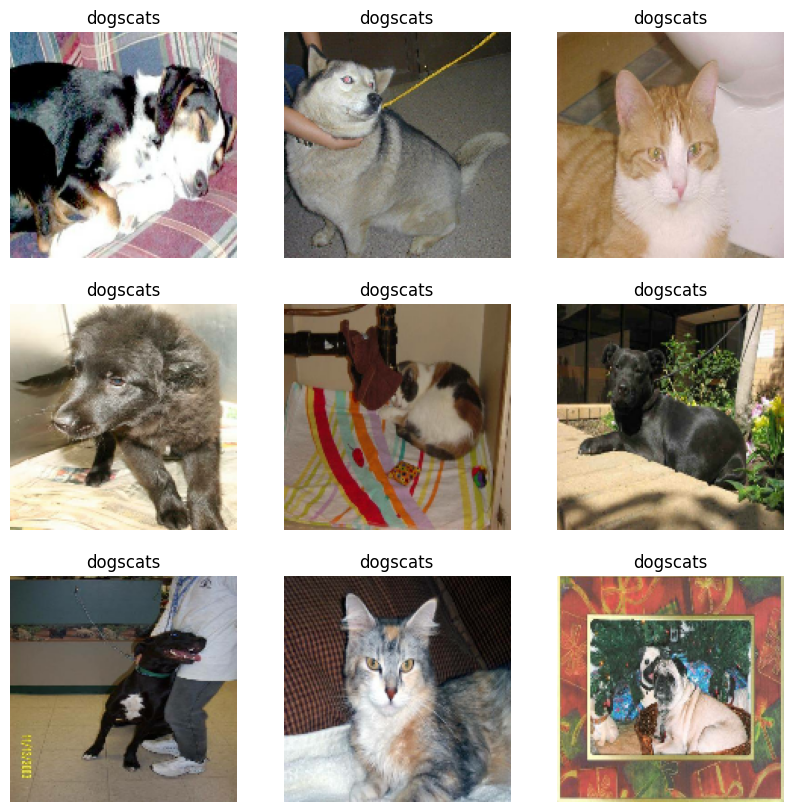

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
 860/1877 ━━━━━━━━━━━━━━━━━━━━ 1:07:58 4s/step - accuracy: 0.9928 - loss: 0.1331

In [ ]:
#import necessary libraries 

import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt

#Load and preprocess the data 

# Define paths to the train and validation datasets
train_dir = '/kaggle/input/dog-vs-cat-fastai/'
validation_dir = '/kaggle/input/dog-vs-cat-fastai/'


# Load the Cats vs. Dogs dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='training',
    validation_split=0.2,
    seed=123
)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='validation',
    validation_split=0.2,
    seed=123
)


# Define the class names
class_names = train_dataset.class_names

#Visualize the data 

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

#Build the Model using Pre-trained base

base_model = applications.VGG16(input_shape=(150, 150, 3),

        include_top=False,
        weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#Compile the model 

model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

#train the model 

history = model.fit(train_dataset,
    epochs=5,
    validation_data=validation_dataset)

#Fine tune the model 


base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy'])
history_fine = model.fit(train_dataset,
    epochs=5,
    validation_data=validation_dataset)

#Evaluate the model 

loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy}')

#Plot training history 

plt.plot(history.history['accuracy'], label='initial training accuracy')
plt.plot(history.history['val_accuracy'], label='initial validation accuracy')
if 'history_fine' in locals():
    plt.plot(history_fine.history['accuracy'], label='fine-tuning accuracy')
    plt.plot(history_fine.history['val_accuracy'], label='fine-tuning validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

